<a href="https://colab.research.google.com/github/Assem-Ch7/AI4CI_Master_degree/blob/Master_1_First_Semester/Copy_of_Class_07_neural_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Class 07 – Artificial Neural Networks with Keras**

# Setup

This project requires Python 3.7 or above:

In [1]:
import sys

assert sys.version_info >= (3, 7)

It also requires Scikit-Learn ≥ 1.0.1:

In [2]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

And TensorFlow ≥ 2.8:

In [3]:
import tensorflow as tf

assert version.parse(tf.__version__) >= version.parse("2.8.0")

Let's define the default font sizes to make the figures prettier:

In [4]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

## The Perceptron

In [7]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 0)  # Iris setosa

per_clf = Perceptron(random_state=42)

# Let's train our model
### your code
per_clf.fit(X, y)

X_new = [[2, 0.5], [3, 1]]

# Predict these two new flowers
y_pred =  per_clf.predict(X_new)### your code

# Show the predictions
### your code
y_pred


array([ True, False])

When the Perceptron finds a decision boundary that properly separates the classes, it stops learning. This means that the decision boundary is often quite close to one class:

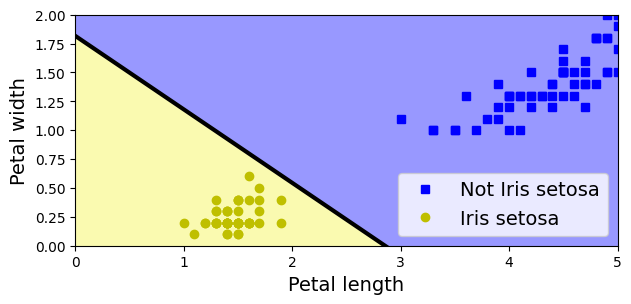

In [8]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

a = -per_clf.coef_[0, 0] / per_clf.coef_[0, 1]
b = -per_clf.intercept_ / per_clf.coef_[0, 1]
axes = [0, 5, 0, 2]
x0, x1 = np.meshgrid(
    np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
    np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
)
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.figure(figsize=(7, 3))
plt.plot(X[y == 0, 0], X[y == 0, 1], "bs", label="Not Iris setosa")
plt.plot(X[y == 1, 0], X[y == 1, 1], "yo", label="Iris setosa")
plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-",
         linewidth=3)
plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="lower right")
plt.axis(axes)
plt.show()

**Activation functions**

## Regression MLPs

In [10]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)

X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)
### your code

mlp_reg = MLPRegressor(hidden_layer_sizes=[50, 50, 50], random_state=42)
# Make a pipeline with StanderScaler() and the MLPRegressor

pipeline = make_pipeline(StandardScaler(), mlp_reg)
### your code

# Train your model
### your code
pipeline.fit(X_train, y_train)

# Make predicts for the validation set
y_pred = pipeline.predict(X_valid)### your code

rmse = mean_squared_error(y_valid, y_pred)
rmse = np.sqrt(rmse)

# Show the result
### your code
rmse

np.float64(0.5053326657968684)

## Classification MLPs

In [11]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

iris = load_iris()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    iris.data, iris.target, test_size=0.1, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=0.1, random_state=42)

mlp_clf = MLPClassifier(hidden_layer_sizes=[5], max_iter=10_000,
                        random_state=42)
pipeline = make_pipeline(StandardScaler(), mlp_clf)
pipeline.fit(X_train, y_train)
accuracy = pipeline.score(X_valid, y_valid)
accuracy

1.0

# Implementing MLPs with Keras
## Building an Image Classifier Using the Sequential API
### Using Keras to load the dataset

Let's start by loading the fashion MNIST dataset. Keras has a number of functions to load popular datasets in `tf.keras.datasets`. The dataset is already split for you between a training set (60,000 images) and a test set (10,000 images), but it can be useful to split the training set further to have a validation set. We'll use 55,000 images for training, and 5,000 for validation.

In [12]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


The training set contains 60,000 grayscale images, each 28x28 pixels:

In [22]:
# Let’s take a look at the shape of the training set:
### Your code

print(X_train.shape)
print(y_train.shape)

(55000, 28, 28)
(55000,)


Each pixel intensity is represented as a byte (0 to 255):

In [ ]:
# Let’s take a look at the type of the training set:
### Your code


In [14]:
# Let's scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255:
### Your code
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

You can plot an image using Matplotlib's `imshow()` function, with a `'binary'`
 color map:

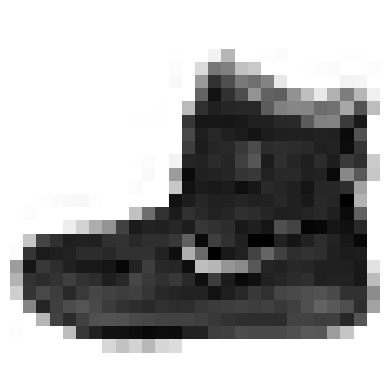

In [15]:
# extra code

plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

The labels are the class IDs (represented as uint8), from 0 to 9:

In [23]:
# Let's take a look at the labels
### your code
print(y_train)

[9 0 0 ... 9 0 2]


Here are the corresponding class names:

In [16]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

So the first image in the training set is an ankle boot:

In [17]:
# Let's take a look at the name of the class of the first image
### your code
print(class_names[y_train[0]])

Ankle boot


Let's take a look at a sample of the images in the dataset:

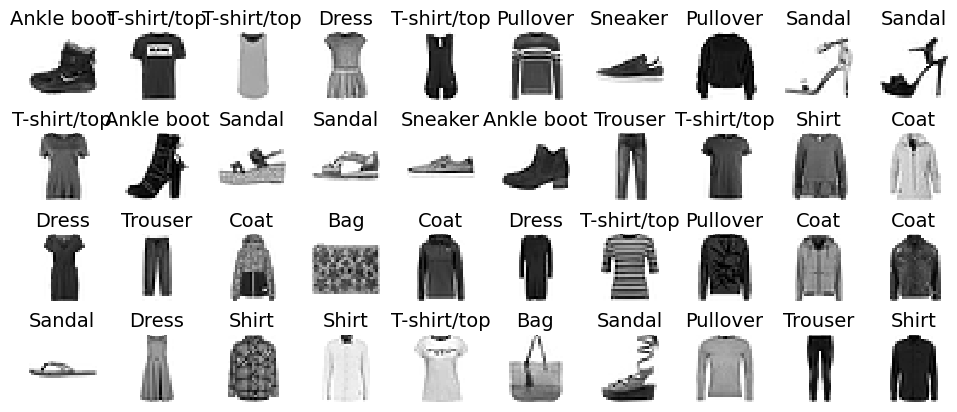

In [18]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.show()

### Creating the model using the Sequential API

In [19]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(shape=[28, 28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [20]:
# extra code – clear the session to reset the name counters
tf.keras.backend.clear_session()
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

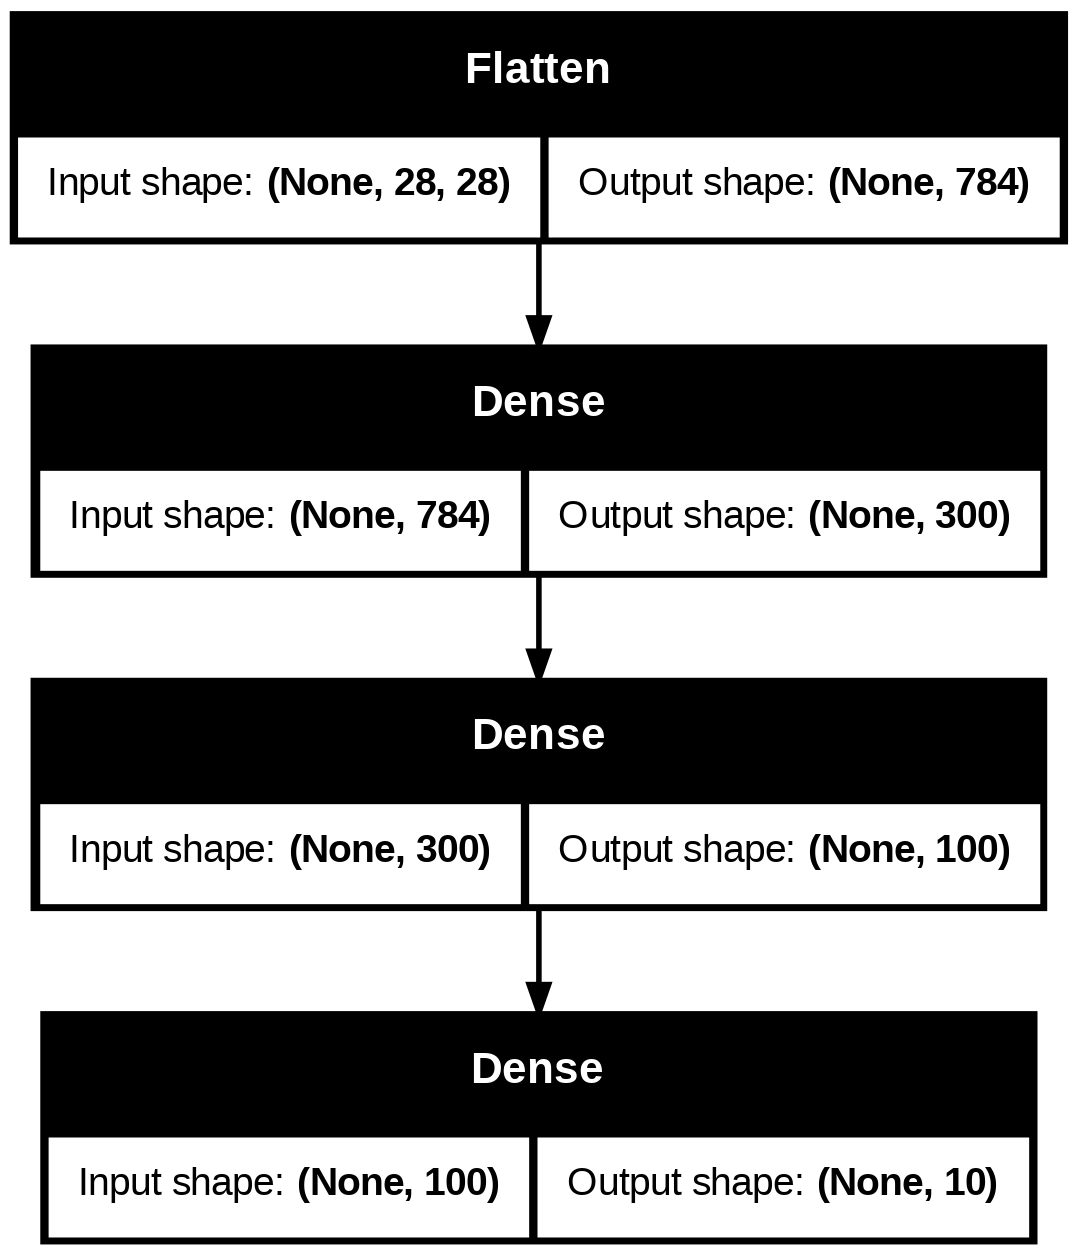

In [24]:
# extra code – another way to display the model's architecture
tf.keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

In [25]:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [26]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [27]:
model.get_layer('dense') is hidden1

True

In [28]:
weights, biases = hidden1.get_weights()
weights

array([[-0.01125976,  0.03803423, -0.00559573, ..., -0.03318007,
         0.03138507,  0.07070404],
       [-0.07287122,  0.03277279,  0.0036825 , ...,  0.05128266,
         0.05216312,  0.0416126 ],
       [ 0.04654207, -0.05658641, -0.01678263, ..., -0.05679675,
         0.00246003, -0.02442467],
       ...,
       [ 0.02551369, -0.05221451,  0.0461838 , ..., -0.02025118,
         0.04594496,  0.03024776],
       [ 0.04055079, -0.03592233, -0.03069145, ...,  0.02643071,
         0.06596683,  0.01905061],
       [ 0.05252305,  0.01495539, -0.04212969, ..., -0.010704  ,
        -0.06423303, -0.05845175]], dtype=float32)

In [29]:
weights.shape

(784, 300)

In [31]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [32]:
biases.shape

(300,)

### Compiling the model

In [33]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

This is equivalent to:

In [ ]:
# extra code – this cell is equivalent to the previous cell
model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=[tf.keras.metrics.sparse_categorical_accuracy])

### Training and evaluating the model

In [39]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/60
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9233 - loss: 0.2185 - val_accuracy: 0.8752 - val_loss: 0.3522
Epoch 2/60
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9248 - loss: 0.2148 - val_accuracy: 0.8758 - val_loss: 0.3509
Epoch 3/60
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9263 - loss: 0.2111 - val_accuracy: 0.8772 - val_loss: 0.3499
Epoch 4/60
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9273 - loss: 0.2076 - val_accuracy: 0.8778 - val_loss: 0.3479
Epoch 5/60
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9290 - loss: 0.2042 - val_accuracy: 0.8784 - val_loss: 0.3489
Epoch 6/60
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9304 - loss: 0.2008 - val_accuracy: 0.8790 - val_loss: 0.3459
Epoch 7/60
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9315 - loss: 0.1972 - val_accuracy: 0.8782 - val_loss: 0.3460
Epoch 8/60
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9326 - loss: 0.1942 -

KeyboardInterrupt: 

In [40]:
history.params

{'verbose': 'auto', 'epochs': 30, 'steps': 1719}

In [41]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


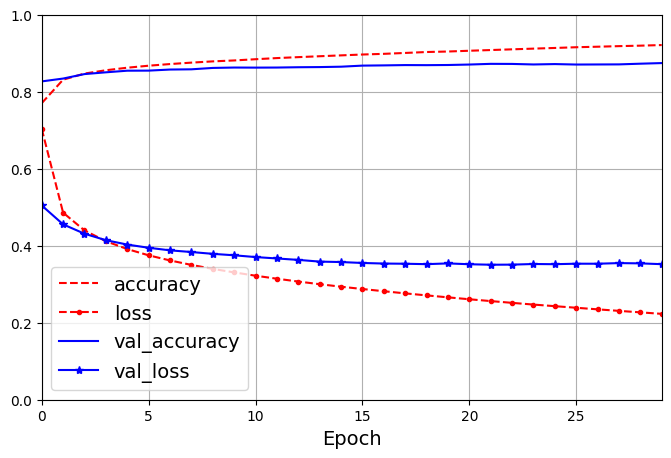

In [42]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.legend(loc="lower left")  # extra code
plt.show()

In [43]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8810 - loss: 0.3851


[0.38356226682662964, 0.8816999793052673]

### Using the model to make predictions

In [44]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [45]:
y_pred = y_proba.argmax(axis=-1)
y_pred

array([9, 2, 1])

In [46]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [47]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

## Building Complex Models Using the Functional API

In [48]:
# extra code – reset the name counters and make the code reproducible
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [49]:
normalization_layer = tf.keras.layers.Normalization()
hidden_layer1 = tf.keras.layers.Dense(30, activation="relu")
hidden_layer2 = tf.keras.layers.Dense(30, activation="relu")
concat_layer = tf.keras.layers.Concatenate()
output_layer = tf.keras.layers.Dense(1)

input_ = tf.keras.layers.Input(shape=X_train.shape[1:])
normalized = normalization_layer(input_)
hidden1 = hidden_layer1(normalized)
hidden2 = hidden_layer2(hidden1)
concat = concat_layer([normalized, hidden2])
output = output_layer(concat)

model = tf.keras.Model(inputs=[input_], outputs=[output])

In [50]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 28, 28)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 28, 28)    │         57 │ input_layer[0][0] │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 28, 30)    │        870 │ normalization[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 28, 30)    │        930 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 28, 58)    │          0 │ normalization[0]… │
│ (Concatenate)       │                   │            │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 28, 1)     │         59 │ concatenate[0][0] │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,916 (7.49 KB)

 Trainable params: 1,859 (7.26 KB)

 Non-trainable params: 57 (232.00 B)

In [51]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
normalization_layer.adapt(X_train)
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - RootMeanSquaredError: 3.2169 - loss: 10.5169 - val_RootMeanSquaredError: 2.9112 - val_loss: 8.4748
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - RootMeanSquaredError: 2.8869 - loss: 8.3343 - val_RootMeanSquaredError: 2.9003 - val_loss: 8.4117
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - RootMeanSquaredError: 2.8795 - loss: 8.2916 - val_RootMeanSquaredError: 2.8965 - val_loss: 8.3895
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - RootMeanSquaredError: 2.8769 - loss: 8.2767 - val_RootMeanSquaredError: 2.8948 - val_loss: 8.3799
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - RootMeanSquaredError: 2.8757 - loss: 8.2695 - val_RootMeanSquaredError: 2.8940 - val_loss: 8.3752
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - RootMeanSquaredError: 2.8748 - loss: 8.2648 - val_RootMeanSquaredError: 2.8936 - val_loss: 8.3729
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - RootMeanSquaredErro

In [52]:
X_new = X_test[:3]
y_pred = model.predict(X_new)

y_test[:3]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


array([9, 2, 1], dtype=uint8)

In [53]:
y_pred

array([[[4.4243965],
        [4.4243965],
        [4.4243965],
        [4.4243965],
        [4.4243965],
        [4.4243965],
        [4.4243965],
        [4.426225 ],
        [4.4301324],
        [4.408123 ],
        [4.416941 ],
        [4.407583 ],
        [4.4015985],
        [4.4112453],
        [4.414272 ],
        [4.433923 ],
        [4.4443836],
        [4.4878325],
        [4.495719 ],
        [4.555169 ],
        [4.545579 ],
        [4.4489784],
        [4.4243965],
        [4.4243965],
        [4.4243965],
        [4.4243965],
        [4.4243965],
        [4.4243965]],

       [[4.417297 ],
        [4.3687487],
        [4.3535   ],
        [4.3866615],
        [4.3905416],
        [4.375188 ],
        [4.331078 ],
        [4.3824115],
        [4.378706 ],
        [4.4093184],
        [4.4109406],
        [4.3975654],
        [4.452529 ],
        [4.42301  ],
        [4.4175   ],
        [4.420714 ],
        [4.418757 ],
        [4.4163766],
        [4.414554 ],
        [4.

Passing different inputs

In [54]:
tf.random.set_seed(42)  # extra code

In [55]:
input_wide = tf.keras.layers.Input(shape=[5])  # features 0 to 4
input_deep = tf.keras.layers.Input(shape=[6])  # features 2 to 7
norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)
hidden1 = tf.keras.layers.Dense(30, activation="relu")(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)
concat = tf.keras.layers.concatenate([norm_wide, hidden2])
output = tf.keras.layers.Dense(1)(concat)
model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output])

In [56]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

X_train_wide, X_train_deep = X_train[:, :5], X_train[:, 2:]
X_valid_wide, X_valid_deep = X_valid[:, :5], X_valid[:, 2:]
X_test_wide, X_test_deep = X_test[:, :5], X_test[:, 2:]
X_new_wide, X_new_deep = X_test_wide[:3], X_test_deep[:3]

norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)
history = model.fit((X_train_wide, X_train_deep), y_train, epochs=20,
                    validation_data=((X_valid_wide, X_valid_deep), y_valid))
mse_test = model.evaluate((X_test_wide, X_test_deep), y_test)
y_pred = model.predict((X_new_wide, X_new_deep))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - RootMeanSquaredError: 1.3886 - loss: 1.9968 - val_RootMeanSquaredError: 0.7685 - val_loss: 0.5906
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.7525 - loss: 0.5669 - val_RootMeanSquaredError: 0.7428 - val_loss: 0.5518
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.6844 - loss: 0.4687 - val_RootMeanSquaredError: 0.6341 - val_loss: 0.4021
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.6542 - loss: 0.4282 - val_RootMeanSquaredError: 0.6868 - val_loss: 0.4716
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - RootMeanSquaredError: 0.6375 - loss: 0.4066 - val_RootMeanSquaredError: 0.5964 - val_loss: 0.3557
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - RootMeanSquaredError: 0.6267 - loss: 0.3930 - val_RootMeanSquaredError: 0.9784 - val_loss: 0.9573
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.6201 - los

Adding an auxiliary output for regularization:

In [57]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [58]:
input_wide = tf.keras.layers.Input(shape=[5])  # features 0 to 4
input_deep = tf.keras.layers.Input(shape=[6])  # features 2 to 7
norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)
hidden1 = tf.keras.layers.Dense(30, activation="relu")(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)
concat = tf.keras.layers.concatenate([norm_wide, hidden2])
output = tf.keras.layers.Dense(1)(concat)
aux_output = tf.keras.layers.Dense(1)(hidden2)
model = tf.keras.Model(inputs=[input_wide, input_deep],
                       outputs=[output, aux_output])

In [59]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss=("mse", "mse"), loss_weights=(0.9, 0.1), optimizer=optimizer,
              metrics=["RootMeanSquaredError", "RootMeanSquaredError"])

In [60]:
norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=20,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid))
)

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - dense_2_RootMeanSquaredError: 1.4657 - dense_2_loss: 2.2708 - dense_3_RootMeanSquaredError: 2.0442 - dense_3_loss: 4.2726 - loss: 2.4710 - val_dense_2_RootMeanSquaredError: 1.2314 - val_dense_2_loss: 1.5157 - val_dense_3_RootMeanSquaredError: 2.3807 - val_dense_3_loss: 5.6650 - val_loss: 1.9315
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - dense_2_RootMeanSquaredError: 0.7120 - dense_2_loss: 0.5077 - dense_3_RootMeanSquaredError: 1.0565 - dense_3_loss: 1.1173 - loss: 0.5687 - val_dense_2_RootMeanSquaredError: 0.7313 - val_dense_2_loss: 0.5347 - val_dense_3_RootMeanSquaredError: 1.2170 - val_dense_3_loss: 1.4805 - val_loss: 0.6295
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - dense_2_RootMeanSquaredError: 0.6717 - dense_2_loss: 0.4515 - dense_3_RootMeanSquaredError: 0.8719 - dense_3_loss: 0.7607 - loss: 0.4824 - val_dense_2_RootMeanSquaredError: 0.6320 - val_dense_2_loss: 0.3993 - val_dense_3_RootMeanSquaredError: 0.8

In [61]:
eval_results = model.evaluate((X_test_wide, X_test_deep), (y_test, y_test))
weighted_sum_of_losses, main_loss, aux_loss, main_rmse, aux_rmse = eval_results

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - dense_2_RootMeanSquaredError: 0.5844 - dense_2_loss: 0.3416 - dense_3_RootMeanSquaredError: 0.6302 - dense_3_loss: 0.3972 - loss: 0.3472


In [62]:
y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))
y_pred_main

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


array([[0.5412152],
       [1.26777  ],
       [3.4852061]], dtype=float32)

## Saving and Restoring a Model

In [63]:
# extra code – delete the directory, in case it already exists

import shutil

shutil.rmtree("my_keras_model", ignore_errors=True)

In [64]:
model.save("my_keras_model.keras")

In [65]:
# extra code – show the contents of the my_keras_model/ directory
from pathlib import Path
for path in sorted(Path("my_keras_model").glob("**/*")):
    print(path)

In [66]:
model = tf.keras.models.load_model("my_keras_model.keras")
y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))
y_pred_main

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


array([[0.5412152],
       [1.26777  ],
       [3.4852061]], dtype=float32)

In [67]:
model.save_weights("my_weights.weights.h5")

In [68]:
model.load_weights("my_weights.weights.h5")

## Using Callbacks

In [69]:
shutil.rmtree("my_checkpoints.weights.h5", ignore_errors=True)  # extra code

In [70]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_checkpoints.weights.h5",
                                                   save_weights_only=True)
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=10,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
    callbacks=[checkpoint_cb])

Epoch 1/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - dense_2_RootMeanSquaredError: 0.5779 - dense_2_loss: 0.3340 - dense_3_RootMeanSquaredError: 0.6269 - dense_3_loss: 0.3931 - loss: 0.3399 - val_dense_2_RootMeanSquaredError: 1.0264 - val_dense_2_loss: 1.0531 - val_dense_3_RootMeanSquaredError: 1.0160 - val_dense_3_loss: 1.0318 - val_loss: 1.0514
Epoch 2/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - dense_2_RootMeanSquaredError: 0.5767 - dense_2_loss: 0.3326 - dense_3_RootMeanSquaredError: 0.6269 - dense_3_loss: 0.3930 - loss: 0.3387 - val_dense_2_RootMeanSquaredError: 1.1915 - val_dense_2_loss: 1.4189 - val_dense_3_RootMeanSquaredError: 1.2541 - val_dense_3_loss: 1.5722 - val_loss: 1.4349
Epoch 3/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - dense_2_RootMeanSquaredError: 0.5756 - dense_2_loss: 0.3313 - dense_3_RootMeanSquaredError: 0.6230 - dense_3_loss: 0.3882 - loss: 0.3370 - val_dense_2_RootMeanSquaredError: 0.9196 - val_dense_2_loss: 0.8453 - val_dense_3_RootMeanSquaredError: 0.8

With EarlyStop

In [71]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10,
                                                     restore_best_weights=True)
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=100,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - dense_2_RootMeanSquaredError: 0.5633 - dense_2_loss: 0.3174 - dense_3_RootMeanSquaredError: 0.6054 - dense_3_loss: 0.3667 - loss: 0.3223 - val_dense_2_RootMeanSquaredError: 0.8099 - val_dense_2_loss: 0.6557 - val_dense_3_RootMeanSquaredError: 0.8748 - val_dense_3_loss: 0.7650 - val_loss: 0.6668
Epoch 2/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - dense_2_RootMeanSquaredError: 0.5626 - dense_2_loss: 0.3166 - dense_3_RootMeanSquaredError: 0.6038 - dense_3_loss: 0.3647 - loss: 0.3214 - val_dense_2_RootMeanSquaredError: 0.8964 - val_dense_2_loss: 0.8032 - val_dense_3_RootMeanSquaredError: 1.0199 - val_dense_3_loss: 1.0397 - val_loss: 0.8272
Epoch 3/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - dense_2_RootMeanSquaredError: 0.5613 - dense_2_loss: 0.3151 - dense_3_RootMeanSquaredError: 0.6014 - dense_3_loss: 0.3618 - loss: 0.3198 - val_dense_2_RootMeanSquaredError: 0.7666 - val_dense_2_loss: 0.5875 - val_dense_3_RootMeanSquaredError: 

In [72]:
class PrintValTrainRatioCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        ratio = logs["val_loss"] / logs["loss"]
        print(f"Epoch={epoch}, val/train={ratio:.2f}")

In [73]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=10,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
    callbacks=[val_train_ratio_cb], verbose=0)

Epoch=0, val/train=1.41
Epoch=1, val/train=1.56
Epoch=2, val/train=1.59
Epoch=3, val/train=1.64
Epoch=4, val/train=3.40
Epoch=5, val/train=2.17
Epoch=6, val/train=1.39
Epoch=7, val/train=1.13
Epoch=8, val/train=1.08
Epoch=9, val/train=1.00


## Assignment

Copy this cell to your new notebook to allow you to save the figures you will generate to put them in your report

In [74]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "unsupervised_learning"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

For each figure, you have to call this function with the name of the figure as a parameter

In [75]:
# Example
save_fig("figure_name")

<Figure size 640x480 with 0 Axes>